Notebook for loading and preprocessing raw data

In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [49]:
# load data from excel file
file = r"../data/raw/Petroleo cru - WTI e Brent e derivados_data-diario_EIA - Original.xls"
excel_file = pd.ExcelFile(file)

In [50]:
# read series into single dataframe
df = pd.DataFrame()
df["crude_oil"] = pd.read_excel(excel_file, sheet_name="Data 1", header=2, index_col=0).iloc[:, 0] / 42
df["conventional_gas"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 0]
df["conventional_gas2"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 1]
df["rbob_regular_gas"] = pd.read_excel(excel_file, sheet_name="Data 3", header=2, index_col=0).iloc[:, 0]
df["heating_oil"] = pd.read_excel(excel_file, sheet_name="Data 4", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel2"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 1]
df["diesel_fuel3"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 2]
df["jet_fuel"] = pd.read_excel(excel_file, sheet_name="Data 6", header=2, index_col=0).iloc[:, 0]
df["propane"] = pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).iloc[:, 0]

# Processing

In [51]:
# aggregate monthly
df["month_date"] = pd.Series(df.index).apply(lambda dt: dt.replace(day=1)).values
month_df = df.groupby("month_date").mean()
month_df.shape

(454, 10)

In [52]:
month_df.head()

,crude_oil,conventional_gas,conventional_gas2,rbob_regular_gas,heating_oil,diesel_fuel,diesel_fuel2,diesel_fuel3,jet_fuel,propane
month_date,,,,,,,,,,
1986-01-01,0.545844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-01,0.367970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,0.300298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,0.305801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,0.366134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# check for most complete series
month_df.isna().mean().sort_values().head(8)

crude_oil            0.000000
conventional_gas     0.011013
conventional_gas2    0.011013
heating_oil          0.011013
jet_fuel             0.112335
propane              0.171806
diesel_fuel3         0.270925
rbob_regular_gas     0.453744
dtype: float64

In [54]:
# filter chosen series and non-missing months
month_df = month_df[[
    'crude_oil', 'conventional_gas', 'heating_oil', 'jet_fuel', 'diesel_fuel3'
]].dropna()

In [55]:
# check first and last month
month_df.index[[0, -1]]

DatetimeIndex(['1996-04-01', '2023-10-01'], dtype='datetime64[ns]', name='month_date', freq=None)

In [56]:
# validate that we have all months between first and last
(month_df.index == pd.date_range(month_df.index[0], month_df.index[-1], freq="MS")).mean() == 1

True

In [57]:
# compute spreads
month_df["spread1"] = np.log(month_df["conventional_gas"] / month_df["crude_oil"])
month_df["spread2"] = np.log(month_df["heating_oil"] / month_df["crude_oil"])
month_df["spread3"] = np.log(month_df["diesel_fuel3"] / month_df["crude_oil"])
month_df["spread4"] = np.log(month_df["jet_fuel"] / month_df["crude_oil"])

# Exploratory Data Analysis

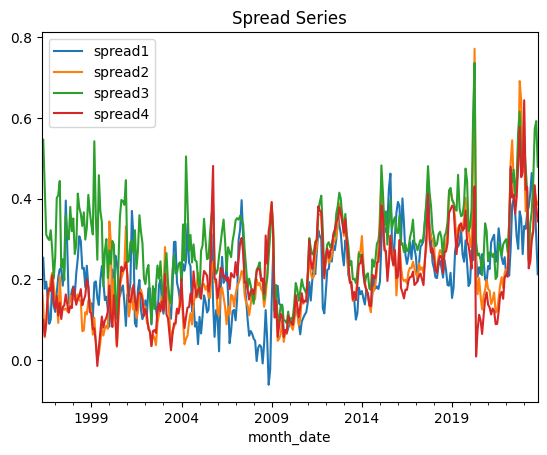

In [58]:
# plot spreads series
month_df[["spread1", "spread2", "spread3", "spread4"]].dropna().plot()
plt.title("Spread Series")
plt.show()

## Unitary Root Tests

In [59]:
from statsmodels.tsa.stattools import adfuller, kpss

In [60]:
for col in month_df.columns[-4:]:
    print(f"\nSeries - {col}")
    print(f"ADF test:")
    (statistic, pval, usedlag, nobs, cvals, resst) = adfuller(month_df[col])
    print(f"p-value = {100*round(pval,4)}%")
    print(f"KPSS test:")
    (statistic, pval, lags, crit) = kpss(month_df[col])
    print(f"p-value = {100*round(pval,4)}%")

    


Series - spread1
ADF test:
p-value = 0.02%
KPSS test:
p-value = 1.0%

Series - spread2
ADF test:
p-value = 0.67%
KPSS test:
p-value = 1.0%

Series - spread3
ADF test:
p-value = 1.6400000000000001%
KPSS test:
p-value = 1.7500000000000002%

Series - spread4
ADF test:
p-value = 0.1%
KPSS test:
p-value = 1.0%


C:\Users\GiovanniAmorim\AppData\Local\Temp\ipykernel_16180\3764566272.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  (statistic, pval, lags, crit) = kpss(month_df[col])
C:\Users\GiovanniAmorim\AppData\Local\Temp\ipykernel_16180\3764566272.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  (statistic, pval, lags, crit) = kpss(month_df[col])
C:\Users\GiovanniAmorim\AppData\Local\Temp\ipykernel_16180\3764566272.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  (statistic, pval, lags, crit) = kpss(month_df[col])


# Auto Correlation

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Series: spread1


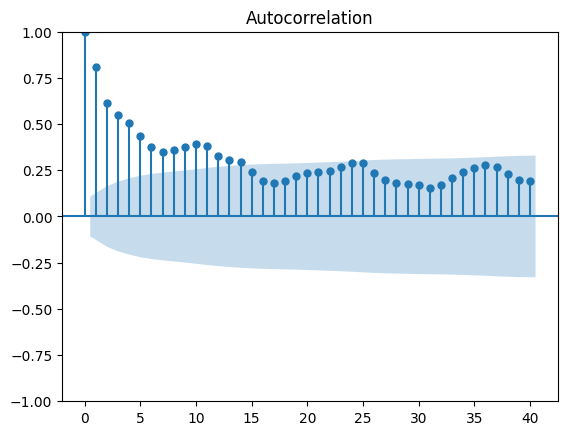

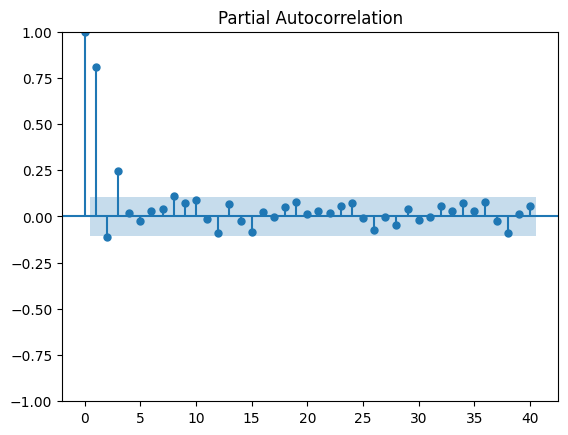


Series: Diff spread1


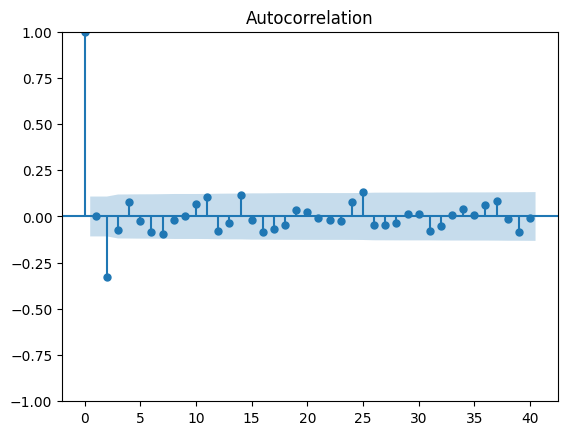

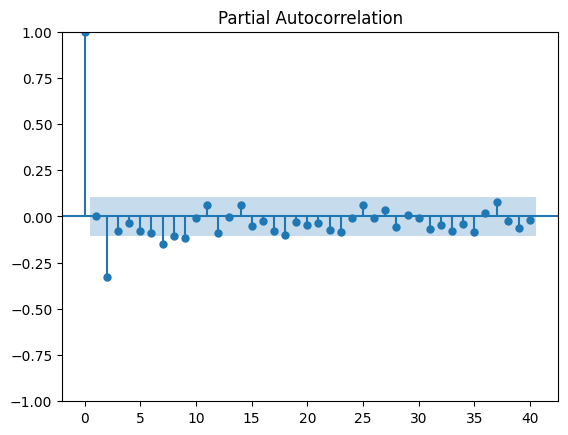


Series: spread2


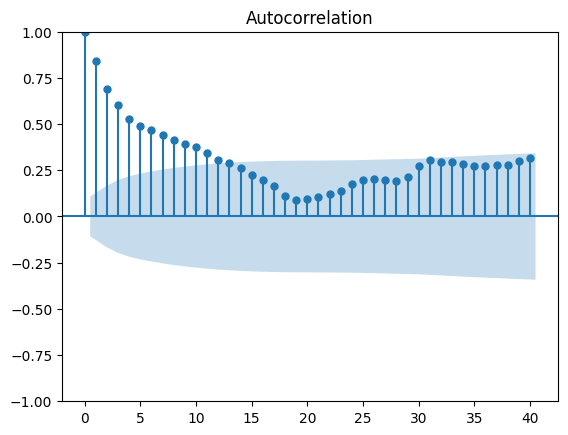

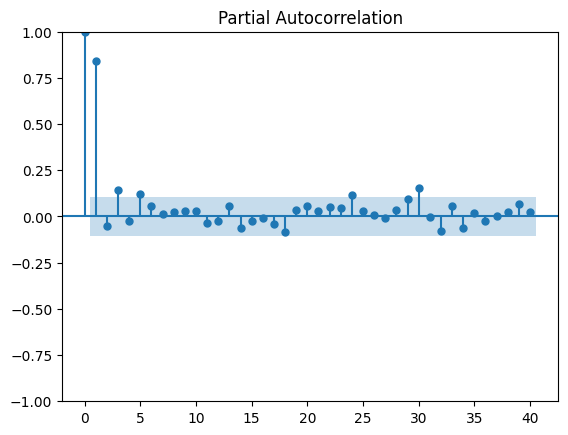


Series: Diff spread2


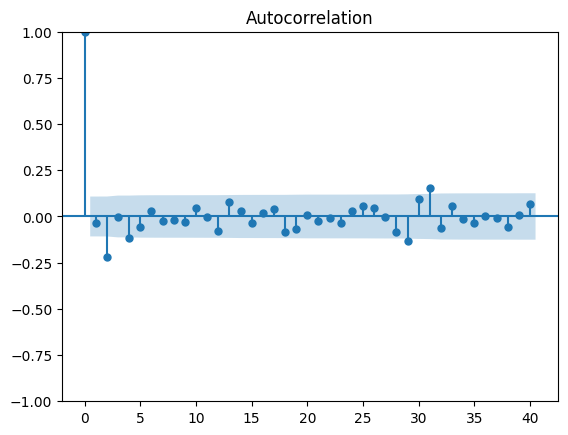

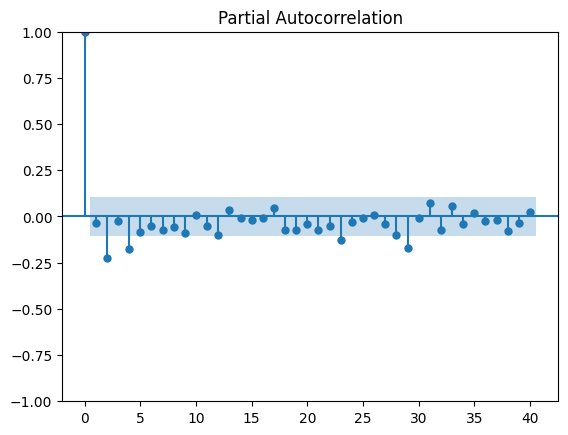


Series: spread3


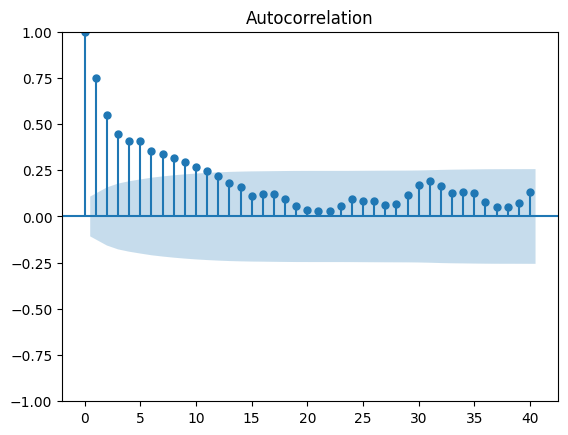

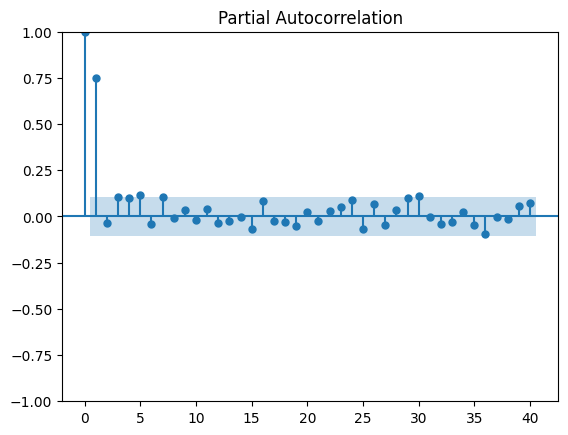


Series: Diff spread3


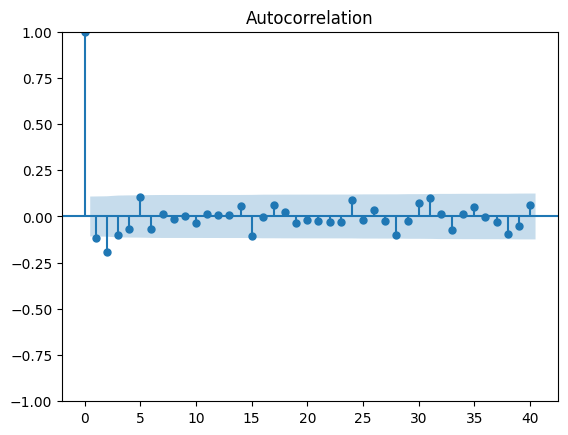

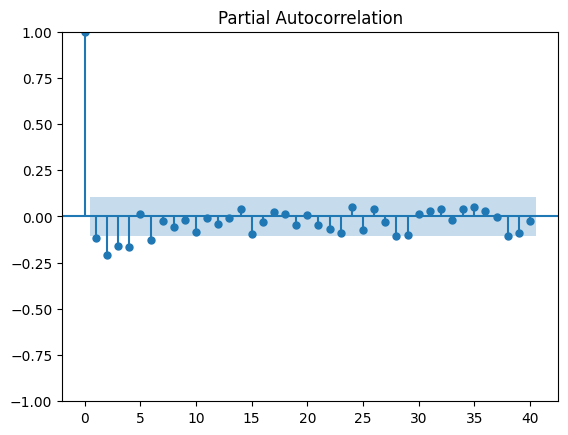


Series: spread4


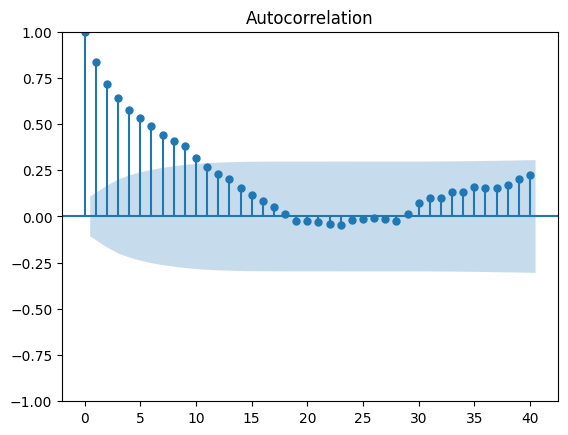

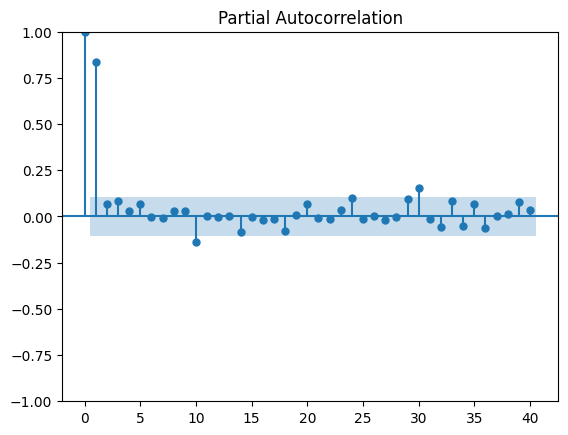


Series: Diff spread4


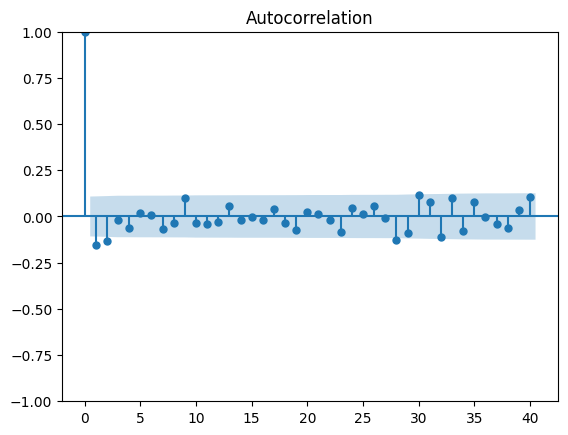

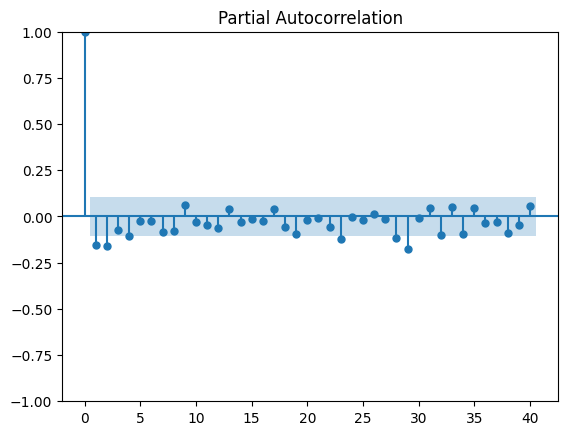

In [62]:
for col in month_df.columns[-4:]:
    print(f"\nSeries: {col}")
    plot_acf(month_df[col].dropna(), lags=40);
    plot_pacf(month_df[col].dropna(), lags=40);
    plt.show()
    print(f"\nSeries: Diff {col}")
    plot_acf(month_df[col].diff(1).dropna(), lags=40);
    plot_pacf(month_df[col].diff(1).dropna(), lags=40);
    plt.show()

# Save Processed Data

In [63]:
month_df.iloc[:, -4:].to_csv(r"../data/trusted/monthly_data.csv")